# Example: NL Assortment Optimization with constraint

This notebook demonstrates how to test an algorithm for the hard instances of the **Nested Logit (NL)** choice model under the constrained setting.

It shows how to:
1. Load the instance
2. Run a method for the instances

## 1. Import Required Modules


In [1]:
import sys
import os
import json

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

notebook_path = os.getcwd() 
project_root = os.path.dirname(notebook_path)  # get the project root directory
sys.path.append(project_root)

from generator.nl_data_generator import *
from generator.utils import *
from generator.constraint import *
from models.nl_functions import *
from method.nl_method import *
from plot import *

print("✅ Modules imported successfully.")

✅ Modules imported successfully.


## 2. Assortment Optimization with Cardinality Constraint
In this section, we show how to load the hard instance under cardinality constraint

### 2.1 Load Data
- We provide two json files in the hard_data folder based on different vi0 distributions
- The number of nests $m \in \{5, 10, 15\}$
- The number of products per nest $n \in \{25, 50, 75\}$
- The cardinality constraint $\{0.1, 0.3, 0.5\} \times n$
- The vi0 distributions include:
   - **uniform01**: vi0 ~ Uniform(0, 1) - Low outside-nest utility
   - **uniform34**: vi0 ~ Uniform(3, 4) - High outside-nest utility

In [2]:
hard_instance_dir = project_root + "/hard_data/"
vi0_method = '01'  # Options: '01', '34'
cardinality_dir = "nl_card_"
input_json_path = hard_instance_dir + cardinality_dir + vi0_method + "_data.json"
instances = load_NL_instances(input_json_path)
print(f"✅ Loaded {len(instances)} instances")

✅ Loaded 345 instances


DATASET STRUCTURE SUMMARY


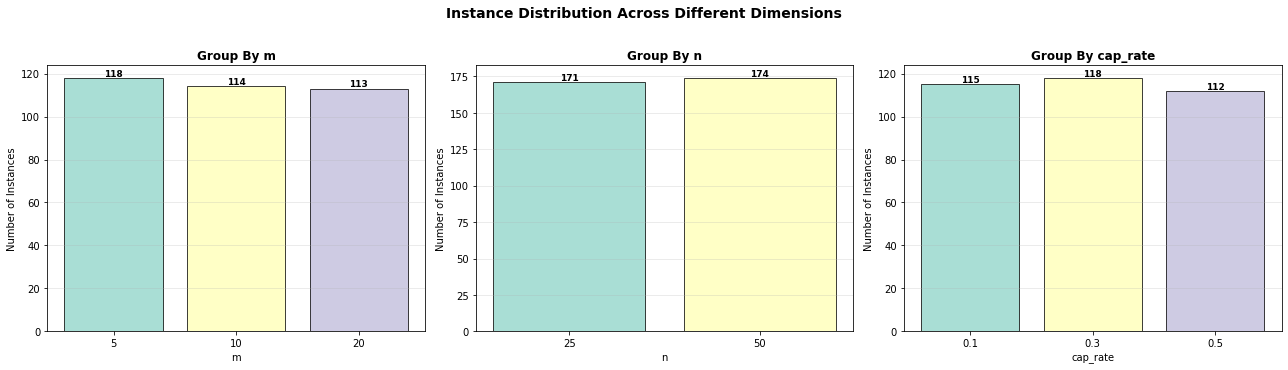

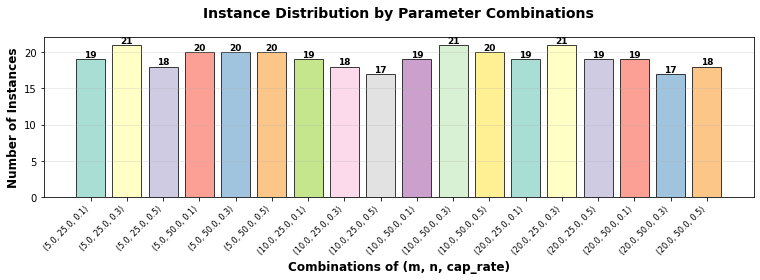

In [3]:
group_cols=['m', 'n','cap_rate']
plot_instance_summary(instances,group_cols)

### 2.2 Run Algorithm on All Instances

In [4]:
# =============================================================================
# PART 2: RUN YOUR ALGORITHM ON ALL INSTANCES
# =============================================================================

# Initialize data paths and result storage
hard_instance_dir = project_root + "/hard_data/"
vi0_method_list = ['01', '34']  # Two vi0 distribution methods to test
results = []

# Loop through each vi0 method
for vi0_method in vi0_method_list:
    # Load instances for the current vi0 method
    input_json_path = hard_instance_dir + cardinality_dir + vi0_method + "_data.json"
    instances = load_NL_instances(input_json_path)
    
    print(f"\nProcessing {vi0_method}...")
    
    # Process each instance
    for idx, data in enumerate(instances):
        # Get the revenue function for this instance
        revenue_fn = get_revenue_function_nl(data)
        cap = data.cap_rate * data.n
        A,B = card_nested_logit(data.m,data.n,cap)        
        # =====================================================================
        # TODO: IMPLEMENT YOUR METHOD HERE
        # =====================================================================
        # Replace the line below with your own algorithm
        # Your method should return a binary matrix of shape (m, n)
        # where 1 means the product is selected, 0 means not selected
        # 
        # The assortment must satisfy the cardinality constraint:
        # The maximum number of products within each nest is limited to cap_rate * n
        #
        # Example:
        #   assortment = your_algorithm(data.m, data.n, data.v, data.price, 
        #                               data.v0, data.vi0, data.gamma, A,B)
        # =====================================================================
        
        assortment = None  # Replace this with your method
        
        # Check if method is implemented
        if assortment is None:
            print("⚠️  Please implement your method in the TODO section above")
            break
        
        # Calculate the revenue achieved by your method
        revenue = revenue_fn(assortment)[0]
        
        # Get the optimal revenue (from exact solution)
        opt_rev = data.max_rev
        
        # Calculate the optimality gap (in percentage)
        gap_method = (opt_rev - revenue) / opt_rev * 100
        
        # Store results for this instance
        result_dict = {
            'm': data.m,                    # Number of nests
            'n': data.n,                    # Number of products per nest
            'vi0_method': vi0_method,       # vi0 distribution method
            'cap_rate': data.cap_rate,      # Capacity rate
            'seed': data.seed,              # Random seed for reproducibility
            'max_rev': opt_rev,             # Optimal revenue
            'revenue': revenue,             # Revenue from your method
            'gap_method': gap_method        # Optimality gap (%)
        }
        
        results.append(result_dict)
    
    if assortment is None:
        break

if assortment is not None:
    print(f"\n✅ Completed testing on {len(results)} instances.")
else:
    print("\n❌ Testing incomplete. Please implement your method first.")


Processing 01...
⚠️  Please implement your method in the TODO section above

❌ Testing incomplete. Please implement your method first.
